In [1]:
import random

import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from catboost import CatBoostClassifier

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    cross_val_score,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier

init_notebook_mode(connected=True)

seed = 42
np.random.seed(seed)
random.seed(seed)
pd.set_option("display.max_columns", 50)
# from termcolor import colored

/home/balde/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [1]:
import random

import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from catboost import CatBoostClassifier

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    cross_val_score,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier

init_notebook_mode(connected=True)

seed = 42
np.random.seed(seed)
random.seed(seed)
pd.set_option("display.max_columns", 50)
# from termcolor import colored

/home/balde/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("SampleSubmission.csv")

In [3]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [5]:
ss.head()

,TransactionId,FraudResult
0,TransactionId_10,NaN
1,TransactionId_100000,NaN
2,TransactionId_100003,NaN
3,TransactionId_100004,NaN
4,TransactionId_100008,NaN


In [6]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
95657    False
95658    False
95659    False
95660    False
95661    False
Length: 95662, dtype: bool

<AxesSubplot:ylabel='count'>

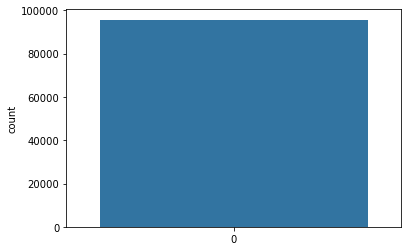

In [7]:
sns.countplot(train["FraudResult"])

In [8]:
train["FraudResult"].unique()

array([0, 1])

In [9]:
# separate minority and majority classes
not_fraud = train[train.FraudResult == 0]
fraud = train[train.FraudResult == 1]

len(not_fraud), len(fraud)

(95469, 193)

In [10]:
print("The class Imbalance in the data is given below")
display(train["FraudResult"].value_counts())
print("---------------------------------------------------------------\n")
print("The class imbalance in terms of percentage is given below ")
display(train["FraudResult"].value_counts(normalize=True))
print("----------------------------------------------------------------\n")
pct_df = (
    pd.DataFrame(train["FraudResult"].value_counts(normalize=True))
    .reset_index()
    .rename({"index": "FraudResult", "Fraud_Result": "Percentage"}, axis=1)
)
# fig = px.bar(
#     pct_df,
#     x="FraudResult",
#     y="Percentage",
#     height=400,
#     width=400,
#     title="class imbalance",
# )
# fig.show()

The class Imbalance in the data is given below


0    95469
1      193
Name: FraudResult, dtype: int64

---------------------------------------------------------------

The class imbalance in terms of percentage is given below 


0    0.997982
1    0.002018
Name: FraudResult, dtype: float64

----------------------------------------------------------------



In [11]:
train["FraudResult"].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

<AxesSubplot:>

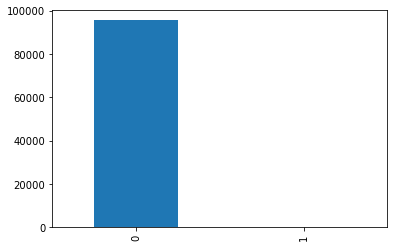

In [12]:
train["FraudResult"].value_counts().plot(kind="bar")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [14]:
# encoding categorical variable
le = LabelEncoder()
train["ProductCategory"] = le.fit_transform(train["ProductCategory"])

# doing the same thing for the test set as well.
test["ProductCategory"] = le.fit_transform(test["ProductCategory"])

In [15]:
train["CurrencyCode"].value_counts()

UGX    95662
Name: CurrencyCode, dtype: int64

# Data Transformation

In [16]:
# Train

train["TransactionId"] = (
    train["TransactionId"].map(lambda x: x.split("_")[1]).astype(int)
)
train["BatchId"] = train["BatchId"].map(lambda x: x.split("_")[1]).astype(int)
train["AccountId"] = train["AccountId"].map(lambda x: x.split("_")[1]).astype(int)
train["SubscriptionId"] = (
    train["SubscriptionId"].map(lambda x: x.split("_")[1]).astype(int)
)
train["CustomerId"] = train["CustomerId"].map(lambda x: x.split("_")[1]).astype(int)
train["ProviderId"] = train["ProviderId"].map(lambda x: x.split("_")[1]).astype(int)
train["ProductId"] = train["ProductId"].map(lambda x: x.split("_")[1]).astype(int)
train["ChannelId"] = train["ChannelId"].map(lambda x: x.split("_")[1]).astype(int)

In [17]:
# test

test["TransactionId"] = test["TransactionId"].map(lambda x: x.split("_")[1]).astype(int)
test["BatchId"] = test["BatchId"].map(lambda x: x.split("_")[1]).astype(int)
test["AccountId"] = test["AccountId"].map(lambda x: x.split("_")[1]).astype(int)
test["SubscriptionId"] = (
    test["SubscriptionId"].map(lambda x: x.split("_")[1]).astype(int)
)
test["CustomerId"] = test["CustomerId"].map(lambda x: x.split("_")[1]).astype(int)
test["ProviderId"] = test["ProviderId"].map(lambda x: x.split("_")[1]).astype(int)
test["ProductId"] = test["ProductId"].map(lambda x: x.split("_")[1]).astype(int)
test["ChannelId"] = test["ChannelId"].map(lambda x: x.split("_")[1]).astype(int)

In [18]:
train["FraudResult"].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [19]:
row2drop = 9500

train_df1 = train[train["FraudResult"] == 0]
train_df2 = train[train["FraudResult"] == 1]
train_df1.shape, train_df2.shape

((95469, 16), (193, 16))

In [20]:
train_df1 = train_df1.drop(train_df1.index[1000:95469])
train_df1.shape

(1000, 16)

In [21]:
train_df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,0,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,2,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,0,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,8,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,2,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [22]:
train_df2.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,60873,93685,3832,4161,4275,UGX,256,3,15,2,3,700000.0,700000,2018-11-15T08:04:51Z,0,1
146,28016,125553,2366,4834,7414,UGX,256,5,9,2,1,725000.0,725000,2018-11-15T08:20:09Z,2,1
155,1149,10381,3832,4161,4275,UGX,256,3,15,2,3,700000.0,700000,2018-11-15T08:31:57Z,0,1
2376,136904,52644,3692,3451,4134,UGX,256,1,15,2,3,700000.0,700000,2018-11-17T09:15:23Z,0,1
2452,88818,54481,3832,4161,4275,UGX,256,3,15,2,3,700000.0,700000,2018-11-17T11:49:46Z,0,1


In [23]:
train = pd.concat([train_df1, train_df2])
train.sample(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
593,15078,61430,4841,3829,2531,UGX,256,4,6,2,2,-20.0,20,2018-11-15T17:39:59Z,2,0
673,87031,59582,3189,2007,3617,UGX,256,6,10,0,3,500.0,500,2018-11-15T19:24:28Z,2,0
435,37084,30170,4841,3829,1979,UGX,256,4,6,2,2,-50.0,50,2018-11-15T15:34:02Z,2,0
379,91764,175,1601,3104,1979,UGX,256,6,10,0,3,1000.0,1000,2018-11-15T14:19:13Z,2,0
500,121563,87180,4841,3829,3683,UGX,256,4,6,2,2,-50.0,50,2018-11-15T16:27:07Z,2,0
652,16121,28528,184,4354,507,UGX,256,5,10,0,3,1100.0,1100,2018-11-15T18:53:07Z,4,0
82341,68589,125935,572,2950,909,UGX,256,5,15,2,3,3000000.0,3000000,2019-02-01T17:29:20Z,0,1
247,91746,48490,4841,3829,2459,UGX,256,4,6,2,2,-20.0,20,2018-11-15T10:31:40Z,2,0
516,87719,56441,1601,3104,1979,UGX,256,6,21,8,3,4500.0,5235,2018-11-15T16:33:05Z,2,0
937,133911,91495,893,1672,1242,UGX,256,6,10,0,3,12000.0,12000,2018-11-16T05:43:05Z,2,0


In [24]:
train["CurrencyCode"].nunique()

1

In [25]:
train.columns.to_list()

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

In [26]:
def preprocess(df):
    df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])
    df["year"] = df["TransactionStartTime"].dt.year
    df["month"] = df["TransactionStartTime"].dt.month
    df["days"] = df["TransactionStartTime"].dt.day
    df["hour"] = df["TransactionStartTime"].dt.hour
    df["weekofyear"] = df["TransactionStartTime"].dt.weekofyear
    df["dayofweek"] = df["TransactionStartTime"].dt.dayofweek
    return df


train = preprocess(train)
test = preprocess(test)
train.head()

<ipython-input-26-df17560f1aef>:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-26-df17560f1aef>:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,year,month,days,hour,weekofyear,dayofweek
0,76871,36123,3957,887,4406,UGX,256,6,10,0,3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018,11,15,2,46,3
1,73770,15642,4841,3829,4406,UGX,256,4,6,2,2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018,11,15,2,46,3
2,26203,53941,4229,222,4683,UGX,256,6,1,0,3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018,11,15,2,46,3
3,380,102363,648,2185,988,UGX,256,1,21,8,3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,2018,11,15,3,46,3
4,28195,38780,4841,3829,988,UGX,256,4,6,2,2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018,11,15,3,46,3


In [27]:
train.columns.to_list()

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult',
 'year',
 'month',
 'days',
 'hour',
 'weekofyear',
 'dayofweek']

In [28]:
# to_drop = [
#     "TransactionId",
#     "BatchId",
#     "AccountId",
#     "SubscriptionId",
#     "CustomerId",
#     "CurrencyCode",
#     "CountryCode",
#     "ProviderId",
#     "ProductId",
# ]

In [29]:
# col2drop = [
#     "CurrencyCode",
#     "CountryCode",
#     "TransactionStartTime",
#     "TransactionId",
#     "BatchId",
#     "AccountId",
#     "SubscriptionId",
#     "CustomerId",
#     "CurrencyCode",
#     "CountryCode",
#     "ProviderId",
#     "ProductId",
# ]

y = train["FraudResult"]
X = train.drop(["TransactionStartTime", "FraudResult", "CurrencyCode"], axis=1)
test = test.drop(["TransactionStartTime", "CurrencyCode"], axis=1)
X.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,year,month,days,hour,weekofyear,dayofweek
0,76871,36123,3957,887,4406,256,6,10,0,3,1000.0,1000,2,2018,11,15,2,46,3
1,73770,15642,4841,3829,4406,256,4,6,2,2,-20.0,20,2,2018,11,15,2,46,3
2,26203,53941,4229,222,4683,256,6,1,0,3,500.0,500,2,2018,11,15,2,46,3
3,380,102363,648,2185,988,256,1,21,8,3,20000.0,21800,2,2018,11,15,3,46,3
4,28195,38780,4841,3829,988,256,4,6,2,2,-644.0,644,2,2018,11,15,3,46,3


In [30]:
# X = X.drop(["ChannelId", "FraudResult"], axis=1)
# test = test.drop("ChannelId", axis=1)
# X.head()

In [31]:
X.shape, test.shape

((1193, 19), (45019, 19))

In [32]:
# pipeline = Pipeline(
#     [
#         ("scaler", StandardScaler()),
#         # ('scale', RobustScaler())
#         # ('quantiletransform', QuantileTransformer(random_state=seed))
#     ]
# )

# X = pd.DataFrame(columns=X.columns, data=pipeline.fit_transform(X))
# test = pd.DataFrame(columns=test.columns, data=pipeline.transform(test))

In [33]:
X.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,year,month,days,hour,weekofyear,dayofweek
0,76871,36123,3957,887,4406,256,6,10,0,3,1000.0,1000,2,2018,11,15,2,46,3
1,73770,15642,4841,3829,4406,256,4,6,2,2,-20.0,20,2,2018,11,15,2,46,3
2,26203,53941,4229,222,4683,256,6,1,0,3,500.0,500,2,2018,11,15,2,46,3
3,380,102363,648,2185,988,256,1,21,8,3,20000.0,21800,2,2018,11,15,3,46,3
4,28195,38780,4841,3829,988,256,4,6,2,2,-644.0,644,2,2018,11,15,3,46,3


In [34]:
# # Oversampling technique

# oversample = SMOTE(random_state=seed)
# # Oversampling the target data
# X, y = oversample.fit_resample(X, y)
# plt.title("Balanced classes")
# sns.countplot(y)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [37]:
# xgb = LogisticRegression()
# xgb.fit(X_train, y_train)
# preds = xgb.predict(X_test)

In [38]:
# final_preds = xgb.predict(test)
# final_preds

In [39]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,year,month,days,hour,weekofyear,dayofweek
0,50600,35028,2441,4426,2857,256,5,3,0,3,1000.0,1000,4,2019,2,13,10,7,2
1,95109,45139,3439,2643,3874,256,5,15,2,3,2000.0,2000,2,2019,2,13,10,7,2
2,47357,74887,4841,3829,2857,256,4,6,2,2,-50.0,50,2,2019,2,13,10,7,2
3,28185,11025,2685,4626,3105,256,5,10,0,3,3000.0,3000,4,2019,2,13,10,7,2
4,22140,29804,4841,3829,3105,256,4,6,2,2,-60.0,60,2,2019,2,13,10,7,2


In [40]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=seed)
# X, y = sm.fit_resample(X, y.ravel())

In [41]:
# y = pd.DataFrame(y)

In [42]:
# y.value_counts()

In [43]:
err = []
y_pred_totcb = []

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train_index, test_index in fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m1 = HistGradientBoostingClassifier()
    # m1 = LogisticRegression()
    m1.fit(
        X_train,
        y_train,
        # eval_set=[(X_test, y_test)],
        # verbose=100,
    )
    preds = m1.predict(X_test)
    print("err: ", f1_score(y_test, preds))
    err.append(f1_score(y_test, preds))
    p2 = m1.predict(test)
    y_pred_totcb.append(p2)
np.mean(err)

err:  1.0
err:  1.0
err:  1.0
err:  1.0
err:  0.9743589743589743
err:  1.0
err:  1.0
err:  1.0
err:  1.0
err:  1.0


0.9974358974358974

In [44]:
final_preds = m1.predict(test)

In [45]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        19

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



In [46]:
ss.head()

,TransactionId,FraudResult
0,TransactionId_10,NaN
1,TransactionId_100000,NaN
2,TransactionId_100003,NaN
3,TransactionId_100004,NaN
4,TransactionId_100008,NaN


In [47]:
ss["FraudResult"] = final_preds
ss.to_csv("sub.csv", index=False)

In [48]:
final_preds

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
ss.head()

,TransactionId,FraudResult
0,TransactionId_10,1
1,TransactionId_100000,1
2,TransactionId_100003,1
3,TransactionId_100004,1
4,TransactionId_100008,1


In [50]:
# feature_importance_df = pd.DataFrame(m1.feature_importances_, columns=["importance"])
# feature_importance_df["feature"] = X.columns

# plt.figure(figsize=(17, 12))
# sns.barplot(
#     x="importance",
#     y="feature",
#     data=feature_importance_df.sort_values(by=["importance"], ascending=False).head(40),
# )
# plt.title("Catboost features importance");

In [51]:
ss["FraudResult"].value_counts()

1    45019
Name: FraudResult, dtype: int64

In [53]:
# # # 0.7831404345536787
# feature_importance_df = pd.DataFrame(m1.feature_importances_, columns=["importance"])
# feature_importance_df["feature"] = X.columns

# plt.figure(figsize=(20, 12))
# sns.barplot(
#     x="importance",
#     y="feature",
#     data=feature_importance_df.sort_values(by=["importance"], ascending=False).head(60),
# )
# plt.title("CatboostClassifier features importance (top 50):")

In [54]:
features = ["Value", "year", "days", "Amount", "TransactionId"]
X = train[features]
test = test[features]

In [55]:
err = []
y_pred_totcb = []

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train_index, test_index in fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # m1 = XGBClassifier()
    m1 = DecisionTreeClassifier()
    m1.fit(
        X_train,
        y_train,
        # eval_set=[(X_test, y_test)],
        # verbose=100,
    )
    preds = m1.predict(X_test)
    print("err: ", f1_score(y_test, preds))
    err.append(f1_score(y_test, preds))
    p2 = m1.predict(test)
    y_pred_totcb.append(p2)
np.mean(err)

err:  1.0
err:  1.0
err:  1.0
err:  1.0
err:  0.9743589743589743
err:  0.9500000000000001
err:  1.0
err:  1.0
err:  1.0
err:  1.0


0.9924358974358973

In [56]:
final_preds = m1.predict(test)

In [57]:
ss["FraudResult"] = final_preds
ss.to_csv("submissions1.csv", index=False)